### Run in collab
<a href="https://colab.research.google.com/github/racousin/data_science_practice/blob/master/website/public/modules/data-science-practice/module9/exercise/module9_exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install swig==4.2.1
!apt-get install xvfb
!pip install box2d-py==2.3.8
!pip install gymnasium[box2d,atari,accept-rom-license]==1.2.0
!pip install pyvirtualdisplay==3.0
!pip install opencv-python-headless
!pip install imageio imageio-ffmpeg
!git clone https://github.com/racousin/rl_introduction.git > /dev/null 2>&1

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

# module9_exercise1 : Q Learning

### Objective
Implement and train a Q-Learning agent to interact with and learn from the 'FrozenLake-v1' environment without a known model.

### Experiment Setup: Evaluate and Train Your Agent

`run_experiment_episode_train` is the core function you will use for agent-environment interaction and learning:

In [3]:
env = gym.make('FrozenLake-v1')

def run_experiment_episode_train(env, agent, nb_episode, is_train=True):
    rewards = np.zeros(nb_episode)
    for i in range(nb_episode):
        state = env.reset()[0]
        terminated, truncated = False, False
        rews = []
        while not (terminated or truncated):
            action = agent.act(state)
            current_state = state
            state, reward, terminated, truncated, info = env.step(action)
            if is_train:
                agent.train(current_state, action, reward, state, terminated or truncated)
            rews.append(reward)
        rewards[i] = sum(rews)
        print(f'Episode: {i} - Cumulative Reward: {rewards[i]}')
    return rewards


In [4]:
class Agent:
    def __init__(self, env):
        self.env = env
    def act(self, state):
        action = env.action_space.sample()
        return action
    def train(self, current_state, action, reward, state, done):
        pass

In [14]:
demo_agent = Agent(env)
run_experiment_episode_train(env, demo_agent, nb_episode=10, is_train=True)

Episode: 0 - Cumulative Reward: 0.0
Episode: 1 - Cumulative Reward: 0.0
Episode: 2 - Cumulative Reward: 0.0
Episode: 3 - Cumulative Reward: 0.0
Episode: 4 - Cumulative Reward: 0.0
Episode: 5 - Cumulative Reward: 0.0
Episode: 6 - Cumulative Reward: 0.0
Episode: 7 - Cumulative Reward: 1.0
Episode: 8 - Cumulative Reward: 0.0
Episode: 9 - Cumulative Reward: 0.0


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

**Exercise 1:** Initialize Q-Learning Agent

**Task 1a:** Initialize the `Agent` class with a Q-table filled with random values. The Q-table should have dimensions corresponding to the environment's state and action space sizes.

**Task 1b:** Create a function, `get_epsilon_greedy_action_from_Q_s`, that chooses an action based on an epsilon-greedy strategy or the argmax of Q for the current state.

**Task 1c:** Update the Agent class's act function to utilize `get_epsilon_greedy_action_from_Q_s` for action selection.

**Task 1d:** Implement the Q-learning update formula in the Agent class's train method.

$Q(S_t,A_t) \leftarrow Q(S_t,A_t)+ \alpha(R_{t+1}+\gamma \max_a Q(S_{t+1},a)−Q(S_t,A_t))$

**Exercise 2:** Train and Evaluate the Agent

**Task 2a:** Run 100 training episodes with the Q-learning agent and collect the rewards.

**Task 2b:** Plot the cumulative reward for each training episode.

**Question 1:**

How can we improve the convergence of our Q-learning agent? Suggestion: add a epsilon_decay_exponential in the train method.

Pour améliorer la convergence, on va faire décroitre epsilon au cours de l'entraînement : on explore beaucoup au début, puis on exploite de plus en plus quand la Q-trable devient stable.
On met à jour ε après chaque épisode (ou après chaque step, mais épisode est souvent plus stable) : eps = max(eps_min, eps * exp(-k))

In [31]:
#TODO: get epsilon greedy policy
def get_epislon_greedy_action_from_q(Q_s,epsilon):
    if np.random.rand() > epsilon:
        # TODO play the action with the Maximum Expected Return
        best_actions = np.flatnonzero(Q_s == Q_s.max())
        return np.random.choice(best_actions)
    else:
        # TODO play a random action
        return np.random.randint(len(Q_s))

In [32]:
#TODO: write Q learning update
class Agent():
    def __init__(self, env, gamma = .99, epsilon = .1, alpha = .01):
        self.env = env
        self.gamma = gamma
        self.epsilon = epsilon
        self.alpha = alpha
        self.q = np.random.rand(self.env.observation_space.n, self.env.action_space.n) # TODO create the Q table function
    def act(self, state):
        action = get_epislon_greedy_action_from_q(self.q[state], self.epsilon)
        return action
    def qsa_update(self, state, action, reward, next_state, done):
      # target = r + gamma * max_a' Q(s', a') (ou juste r si terminal)
      if done:
        target = reward
      else:
        target = reward + self.gamma * np.max(self.q[next_state])# TODO
      td_error = target - self.q[state, action] # TODO
      self.q[state, action] += self.alpha * td_error # TODO

    def train(self, current_state, action, reward, next_state, done):
        self.qsa_update(current_state, action, reward, next_state, done)

In [33]:
q_agent = Agent(env)
rewards = run_experiment_episode_train(env, q_agent, 1000)

Episode: 0 - Cumulative Reward: 0.0
Episode: 1 - Cumulative Reward: 0.0
Episode: 2 - Cumulative Reward: 0.0
Episode: 3 - Cumulative Reward: 0.0
Episode: 4 - Cumulative Reward: 0.0
Episode: 5 - Cumulative Reward: 0.0
Episode: 6 - Cumulative Reward: 0.0
Episode: 7 - Cumulative Reward: 0.0
Episode: 8 - Cumulative Reward: 0.0
Episode: 9 - Cumulative Reward: 0.0
Episode: 10 - Cumulative Reward: 0.0
Episode: 11 - Cumulative Reward: 0.0
Episode: 12 - Cumulative Reward: 0.0
Episode: 13 - Cumulative Reward: 0.0
Episode: 14 - Cumulative Reward: 0.0
Episode: 15 - Cumulative Reward: 0.0
Episode: 16 - Cumulative Reward: 0.0
Episode: 17 - Cumulative Reward: 0.0
Episode: 18 - Cumulative Reward: 0.0
Episode: 19 - Cumulative Reward: 0.0
Episode: 20 - Cumulative Reward: 0.0
Episode: 21 - Cumulative Reward: 0.0
Episode: 22 - Cumulative Reward: 0.0
Episode: 23 - Cumulative Reward: 0.0
Episode: 24 - Cumulative Reward: 0.0
Episode: 25 - Cumulative Reward: 0.0
Episode: 26 - Cumulative Reward: 0.0
Episode: 27

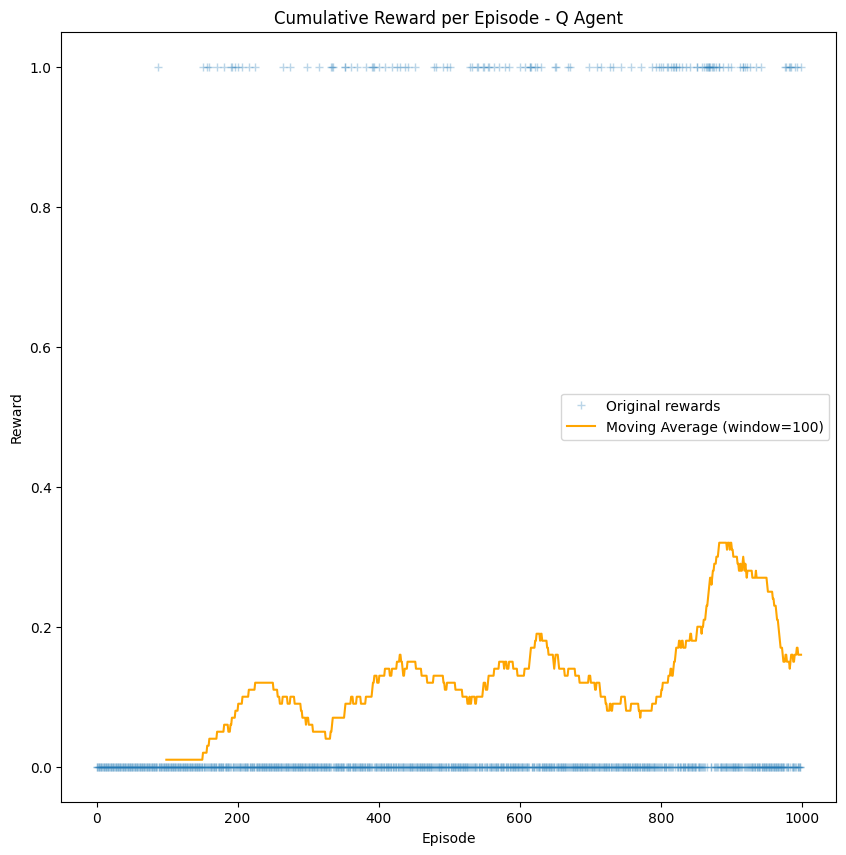

In [22]:
window_size = 100
moving_avg = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')

# Plot the results
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(rewards, '+', alpha=0.3, label='Original rewards')
ax.plot(range(window_size-1, len(rewards)), moving_avg, label=f'Moving Average (window={window_size})', color='orange')
ax.set_title('Cumulative Reward per Episode - Q Agent')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.legend()

plt.show()

In [46]:
#TODO: write Q learning update
class DecayAgent():
    def __init__(self, env, gamma = .99, epsilon = .1, alpha = .01):
        self.env = env
        self.gamma = gamma
        self.epsilon = epsilon
        self.alpha = alpha
        self.q = np.random.rand(self.env.observation_space.n, self.env.action_space.n)
    def act(self, state):
      # exp_render peut fournir (obs, info) ou un array -> on récupère obs
      if isinstance(state, tuple):
        state = state[0]
      # si c'est un numpy array (ex: array([3])) -> on prend le scalaire
      if isinstance(state, np.ndarray):
        state = int(state.item())
      # si c'est un numpy scalar (ex: np.int64)
      state = int(state)
      action = get_epislon_greedy_action_from_q(self.q[state], self.epsilon)
      return action

    def qsa_update(self, state, action, reward, next_state, done):
      if done:
        target = reward
      else:
        target = reward + self.gamma * np.max(self.q[next_state])
      td_error = target - self.q[state, action]
      self.q[state, action] += self.alpha * td_error

    def epsilon_decay_exponential(self, decay_rate=0.001, epsilon_min=0.01):
      self.epsilon = max(epsilon_min, self.epsilon * np.exp(-decay_rate))

    def train(self, current_state, action, reward, next_state, done):
        self.qsa_update(current_state, action, reward, next_state, done)
        if done:  # decay à la fin de l'épisode
          self.epsilon_decay_exponential(decay_rate=0.001, epsilon_min=0.01)

In [47]:
# Initialize agents with random and optimal policies
decay_agent = DecayAgent(env)
agent = Agent(env)

# Run experiments for each agent
rewards_decay_agent = run_experiment_episode_train(env, decay_agent, 1000)
rewards_agent = run_experiment_episode_train(env, agent, 1000)


Episode: 0 - Cumulative Reward: 0.0
Episode: 1 - Cumulative Reward: 0.0
Episode: 2 - Cumulative Reward: 0.0
Episode: 3 - Cumulative Reward: 0.0
Episode: 4 - Cumulative Reward: 0.0
Episode: 5 - Cumulative Reward: 0.0
Episode: 6 - Cumulative Reward: 0.0
Episode: 7 - Cumulative Reward: 0.0
Episode: 8 - Cumulative Reward: 0.0
Episode: 9 - Cumulative Reward: 0.0
Episode: 10 - Cumulative Reward: 0.0
Episode: 11 - Cumulative Reward: 0.0
Episode: 12 - Cumulative Reward: 0.0
Episode: 13 - Cumulative Reward: 0.0
Episode: 14 - Cumulative Reward: 0.0
Episode: 15 - Cumulative Reward: 0.0
Episode: 16 - Cumulative Reward: 0.0
Episode: 17 - Cumulative Reward: 0.0
Episode: 18 - Cumulative Reward: 0.0
Episode: 19 - Cumulative Reward: 0.0
Episode: 20 - Cumulative Reward: 0.0
Episode: 21 - Cumulative Reward: 0.0
Episode: 22 - Cumulative Reward: 0.0
Episode: 23 - Cumulative Reward: 0.0
Episode: 24 - Cumulative Reward: 0.0
Episode: 25 - Cumulative Reward: 0.0
Episode: 26 - Cumulative Reward: 0.0
Episode: 27

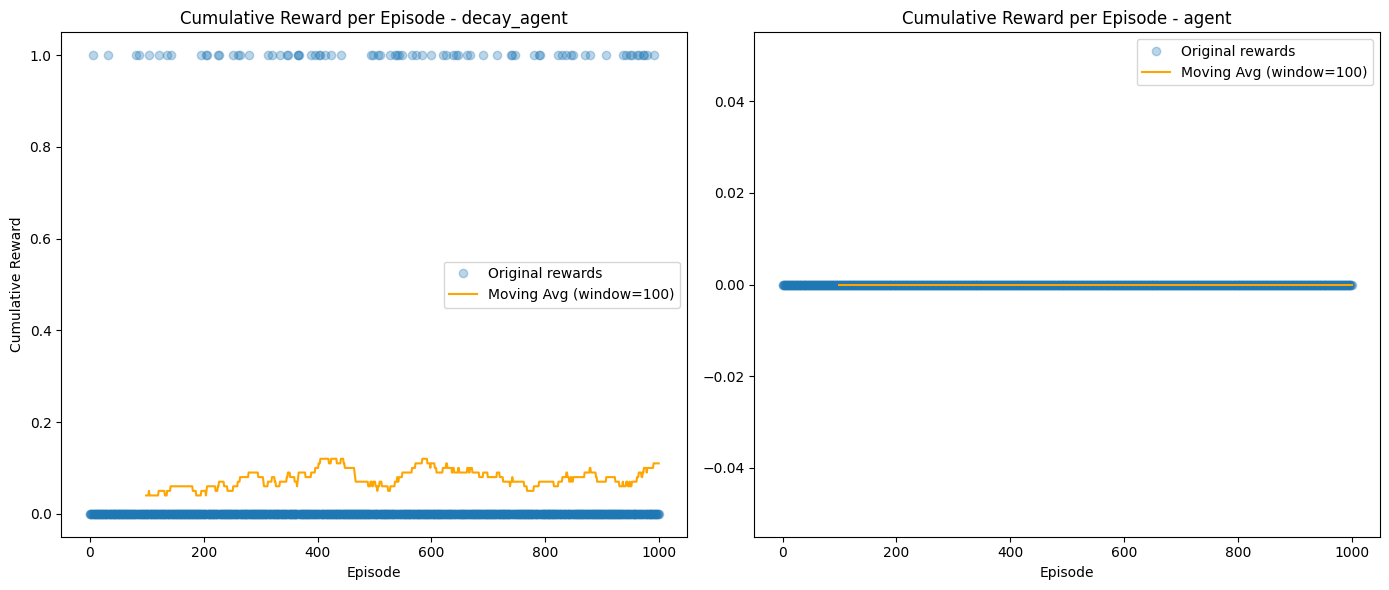

In [48]:
# Compute the moving average with a window size of 100
window_size = 100
moving_avg = np.convolve(rewards_agent, np.ones(window_size) / window_size, mode='valid')
moving_avg_decay = np.convolve(rewards_decay_agent, np.ones(window_size) / window_size, mode='valid')

# Plot with subplots
plt.figure(figsize=(14, 6))

# First subplot: Original rewards with moving average for decay_agent
plt.subplot(1, 2, 1)
plt.plot(rewards_agent, 'o', alpha=0.3, label='Original rewards')
plt.plot(range(window_size - 1, len(rewards_agent)), moving_avg, label=f'Moving Avg (window={window_size})', color='orange')
plt.title('Cumulative Reward per Episode - decay_agent')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.legend()

# Second subplot: Original rewards with moving average for agent
plt.subplot(1, 2, 2)
plt.plot(rewards_decay_agent, 'o', alpha=0.3, label='Original rewards')
plt.plot(range(window_size - 1, len(rewards_decay_agent)), moving_avg_decay, label=f'Moving Avg (window={window_size})', color='orange')
plt.title('Cumulative Reward per Episode - agent')
plt.xlabel('Episode')
plt.legend()

# Adjust layout and show
plt.tight_layout()
plt.show()


In [49]:
# Watch your agent play

from rl_introduction.rl_introduction.render_colab import exp_render
exp_render({"name":'FrozenLake-v1', "fps":2, "nb_step":30, "agent": decay_agent})

# creat/train/test your agent in other discrete action-space env

In [52]:
import numpy as np
import gymnasium as gym
from collections import defaultdict
import matplotlib.pyplot as plt

def epsilon_greedy(Q_s, epsilon):
    # Q_s : np.array shape (n_actions,)
    if np.random.rand() < epsilon:
        return np.random.randint(len(Q_s))
    best = np.flatnonzero(Q_s == Q_s.max())
    return np.random.choice(best)

class TabularQLearningAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_min=0.05, epsilon_decay=0.001):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay

        assert isinstance(env.action_space, gym.spaces.Discrete), "Action space doit être Discrete pour ce code."
        self.nA = env.action_space.n

        # Q est un dict : state -> np.array(nA)
        self.Q = defaultdict(lambda: np.zeros(self.nA, dtype=np.float32))

    def act(self, obs, greedy=False):
        state = obs  # obs peut être int ou tuple => OK comme clé dict
        eps = 0.0 if greedy else self.epsilon
        return epsilon_greedy(self.Q[state], eps)

    def update(self, obs, action, reward, next_obs, done):
        s, s2 = obs, next_obs
        target = reward if done else reward + self.gamma * np.max(self.Q[s2])
        self.Q[s][action] += self.alpha * (target - self.Q[s][action])

    def decay_epsilon(self):
        self.epsilon = max(self.epsilon_min, self.epsilon * np.exp(-self.epsilon_decay))

In [53]:
def train_agent(env_id, n_episodes=5000, max_steps=200, seed=0,
                alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_min=0.05, epsilon_decay=0.001):
    env = gym.make(env_id)
    agent = TabularQLearningAgent(env, alpha, gamma, epsilon, epsilon_min, epsilon_decay)

    rng = np.random.default_rng(seed)
    episode_returns = []

    for ep in range(n_episodes):
        obs, info = env.reset(seed=int(rng.integers(0, 1_000_000)))
        G = 0.0

        for t in range(max_steps):
            a = agent.act(obs)
            next_obs, r, terminated, truncated, info = env.step(a)
            done = terminated or truncated

            agent.update(obs, a, r, next_obs, done)
            G += r
            obs = next_obs

            if done:
                break

        agent.decay_epsilon()
        episode_returns.append(G)

    env.close()
    return agent, np.array(episode_returns, dtype=np.float32)

def test_agent(env_id, agent, n_episodes=100, max_steps=200, seed=123):
    env = gym.make(env_id)
    rng = np.random.default_rng(seed)
    returns = []

    for ep in range(n_episodes):
        obs, info = env.reset(seed=int(rng.integers(0, 1_000_000)))
        G = 0.0
        for t in range(max_steps):
            a = agent.act(obs, greedy=True)  # greedy => epsilon = 0
            obs, r, terminated, truncated, info = env.step(a)
            G += r
            if terminated or truncated:
                break
        returns.append(G)

    env.close()
    returns = np.array(returns, dtype=np.float32)
    return returns.mean(), returns.std(), returns

In [64]:
env_ids = ["FrozenLake-v1", "Taxi-v3", "CliffWalking-v1", "Blackjack-v1"]

results = {}
for env_id in env_ids:
    agent, ep_returns = train_agent(env_id, n_episodes=5000, max_steps=200,
                                    alpha=0.1, gamma=0.99,
                                    epsilon=1.0, epsilon_min=0.05, epsilon_decay=0.001)

    mean_test, std_test, test_returns = test_agent(env_id, agent, n_episodes=200, max_steps=200)
    results[env_id] = (ep_returns, mean_test, std_test)

    print(f"{env_id}: test mean={mean_test:.3f} ± {std_test:.3f}")

FrozenLake-v1: test mean=0.705 ± 0.456
Taxi-v3: test mean=7.755 ± 2.677
CliffWalking-v1: test mean=-13.000 ± 0.000
Blackjack-v1: test mean=0.000 ± 0.959


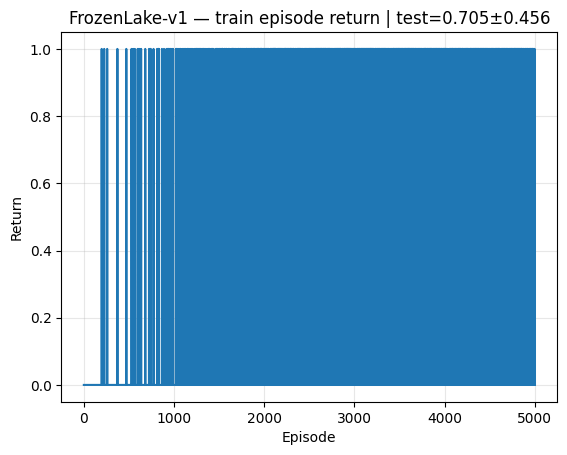

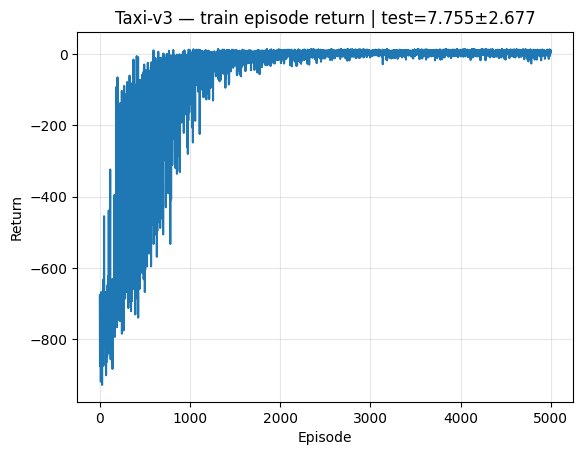

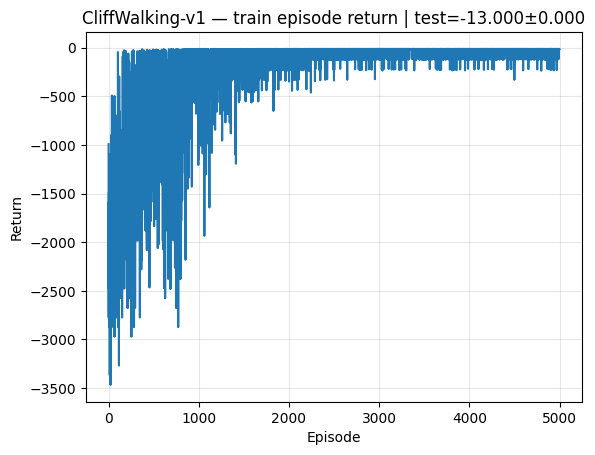

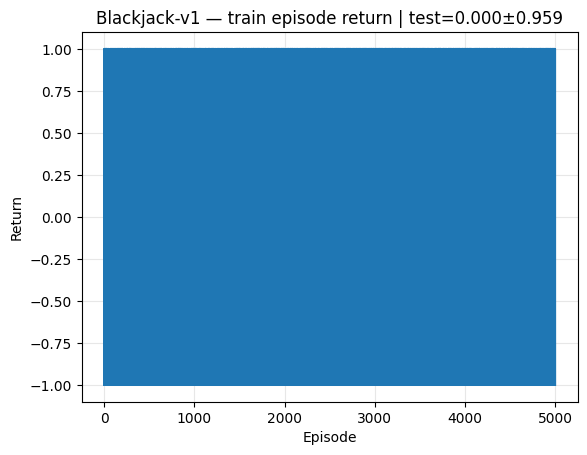

In [65]:
for env_id, (ep_returns, mean_test, std_test) in results.items():
    plt.figure()
    plt.plot(ep_returns)
    plt.title(f"{env_id} — train episode return | test={mean_test:.3f}±{std_test:.3f}")
    plt.xlabel("Episode")
    plt.ylabel("Return")
    plt.grid(True, alpha=0.3)
    plt.show()